In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
RESULT_FILE = '../files/results/experimental_results_CECOVEL.csv'

In [3]:
results = pd.read_csv(RESULT_FILE, delimiter=";")

# Add column with architecture type (TCN or LSTM)
results['ARCHITECTURE'] = results['MODEL'].map(lambda x: 'LSTM' if 'LSTM' in x else ('TCN' if 'TCN' in x else 'NONE'))

#Set model characteristic as index
index_rows = results[['MODEL', 'MODEL_DESCRIPTION', 'FORECAST_HORIZON', 'PAST_HISTORY', 'BATCH_SIZE']].copy()
results = results.set_index(['MODEL', 'MODEL_DESCRIPTION', 'FORECAST_HORIZON', 'PAST_HISTORY', 'BATCH_SIZE'])

results.head()

,,,,,EPOCHS,mse,rmse,nrmse,mae,wape,mpe,mape,mdape,smape,...,val_mre,val_rae,val_mrae,val_std_ae,val_std_ape,loss,val_loss,Execution_time,Device,ARCHITECTURE
MODEL,MODEL_DESCRIPTION,FORECAST_HORIZON,PAST_HISTORY,BATCH_SIZE,,,,,,,,,,,,,,,,,,,,,
TCN_49,"{'nb_filters': 32, 'kernel_size': 2, 'nb_stacks': 3, 'dilations': [1, 5, 7, 14, 28], 'dropout_rate': 0}",48,168,64,25,1570.2758,39.626705,0.236469,25.612476,0.732238,-70261960,89520090,0.658073,88.389587,...,6.424039,0.892988,31.836588,205.001569,5.381960e+10,"[85.88015238444011, 5.1335875373004605, 2.5895...","[10.080386455928053, 4.1851741621427445, 2.565...",62.584590,"[PhysicalDevice(name='/physical_device:GPU:0',...",TCN
TCN_101,"{'nb_filters': 32, 'kernel_size': 3, 'nb_stacks': 1, 'dilations': [1, 5, 7, 14, 28, 56], 'dropout_rate': 0}",48,168,64,25,592.7426,24.346306,0.145284,16.416924,0.469345,-68508830,68508830,0.454812,61.484307,...,5.288754,0.519845,19.207983,114.515257,3.734289e+10,"[1.3108817204850582, 0.5912648225982001, 0.561...","[0.7327176722410683, 0.6905707956474518, 0.674...",30.734277,"[PhysicalDevice(name='/physical_device:GPU:0',...",TCN
TCN_117,"{'nb_filters': 32, 'kernel_size': 3, 'nb_stacks': 2, 'dilations': [1, 5, 7, 14, 28], 'dropout_rate': 0}",48,168,64,25,1017.4043,31.896776,0.190341,20.527897,0.586874,-66942650,67135500,0.538564,70.522594,...,5.992416,0.701600,27.253448,158.803677,4.118769e+10,"[10.848592901398352, 1.108784721653088, 0.7834...","[1.8832770385474802, 1.090607543972051, 0.8866...",42.824529,"[PhysicalDevice(name='/physical_device:GPU:0',...",TCN
TCN_150,"{'nb_filters': 32, 'kernel_size': 3, 'nb_stacks': 4, 'dilations': [1, 5, 7, 14], 'dropout_rate': 0}",48,168,64,25,1599.8984,39.998730,0.238689,26.400805,0.754776,-54490704,79532340,0.703706,94.378245,...,5.989051,0.959757,34.692463,210.992290,5.915383e+10,"[143.90418310131707, 6.961395150781099, 3.7535...","[14.305950200446299, 5.956979925387373, 3.8978...",63.236834,"[PhysicalDevice(name='/physical_device:GPU:0',...",TCN
TCN_218,"{'nb_filters': 32, 'kernel_size': 4, 'nb_stacks': 3, 'dilations': [1, 5, 7, 14], 'dropout_rate': 0}",48,168,64,25,1233.8160,35.125717,0.209609,22.303078,0.637625,-79979830,80846030,0.581175,76.709735,...,5.124824,0.791186,26.376100,178.172103,4.326967e+10,"[18.356537385879893, 1.3841889050599403, 0.924...","[2.4132739673151034, 1.3146199299910357, 1.023...",49.945830,"[PhysicalDevice(name='/physical_device:GPU:0',...",TCN


In [4]:
metric_columns = ['mse', 'rmse', 'nrmse', 'mae', 'wape', 'mpe', 'mape',
       'mdape', 'smape', 'smdape', 'mase', 'rmspe', 'rmsse', 'mre', 'rae',
       'mrae', 'std_ae', 'std_ape']
METRIC = 'wape'
cmap={'TCN':(0.5019607843137255, 0.5019607843137255, 0.9916562369628703), 'LSTM':(0.4519420198186802, 0.16470588235294117, 0.32941176470588235)}

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
/home/plara/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


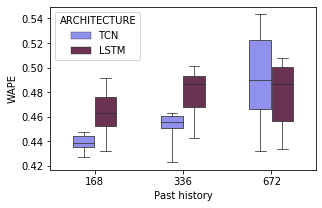

In [5]:
top_by_pasthistory = pd.DataFrame(columns=['PAST_HISTORY','ARCHITECTURE', METRIC])

for ph, _results in results.groupby('PAST_HISTORY'):
    for arch, __results in _results.groupby('ARCHITECTURE'):
        top_by_pasthistory = top_by_pasthistory.append(__results.reset_index().sort_values(METRIC)[['PAST_HISTORY','ARCHITECTURE', METRIC]].head(21), ignore_index=True)

fig, ax = plt.subplots(1,1,figsize=(4.75,3))
sns.boxplot(data=top_by_pasthistory, x='PAST_HISTORY', y=METRIC, hue='ARCHITECTURE', linewidth=0.75, palette=cmap, width=0.5, whis=100, hue_order=['TCN', 'LSTM'], ax=ax)    
ax.set_xlabel('Past history')
ax.set_ylabel(METRIC.upper())
fig.savefig('../files/images/EV-ResultsDistribution-pastHistory.eps'.format(ph), format='eps', bbox_inches='tight')

fig.show()

In [6]:
top_tcn = results[results['ARCHITECTURE']=='TCN'].sort_values(METRIC).head(1)
print('TCN')
print('\t'+'\n\t'.join(['{}: {}'.format(k,v) for k,v in zip(top_tcn.index.names,top_tcn.index[0])]))
print('\tEPHOCS: '+str(top_tcn[['EPOCHS']].values[0][0]))


top_lstm = results[results['ARCHITECTURE']=='LSTM'].sort_values(METRIC).head(1)
print('LSTM')
print('\t'+'\n\t'.join(['{}: {}'.format(k,v) for k,v in zip(top_lstm.index.names,top_lstm.index[0])]))
print('\tEPHOCS: '+str(top_lstm[['EPOCHS']].values[0][0]))

TCN
	MODEL: TCN_1222
	MODEL_DESCRIPTION: {'nb_filters': 128, 'kernel_size': 6, 'nb_stacks': 2, 'dilations': [1, 5, 7, 14, 28], 'dropout_rate': 0}
	FORECAST_HORIZON: 48
	PAST_HISTORY: 336
	BATCH_SIZE: 64
	EPHOCS: 100
LSTM
	MODEL: LSTM_5
	MODEL_DESCRIPTION: {'num_stack_layers': 2, 'units': 128, 'dropout': 0}
	FORECAST_HORIZON: 48
	PAST_HISTORY: 168
	BATCH_SIZE: 128
	EPHOCS: 50


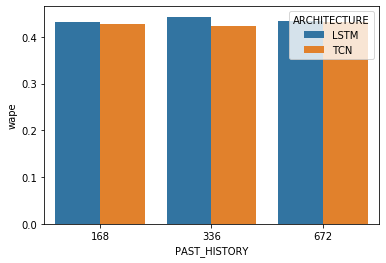

PAST_HISTORY,168,336,672
ARCHITECTURE,,,
LSTM,0.431729,0.442915,0.433637
TCN,0.427244,0.422849,0.431908


In [7]:
top_by_pasthistory = pd.DataFrame(columns=['PAST_HISTORY','ARCHITECTURE', METRIC])

for ph, _results in results.groupby('PAST_HISTORY'):
    for arch, __results in _results.groupby('ARCHITECTURE'):
        top_by_pasthistory = top_by_pasthistory.append(__results.reset_index().sort_values(METRIC)[['PAST_HISTORY','ARCHITECTURE', METRIC]].head(1), ignore_index=True)

sns.barplot(data=top_by_pasthistory, x='PAST_HISTORY', y=METRIC, hue='ARCHITECTURE')
plt.show()

top_by_pasthistory.pivot(index='ARCHITECTURE', columns='PAST_HISTORY', values=METRIC)

/home/plara/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/home/plara/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:60: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/home/plara/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:91: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


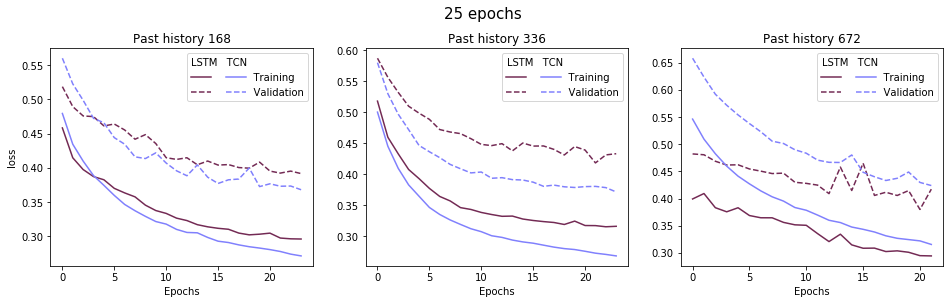

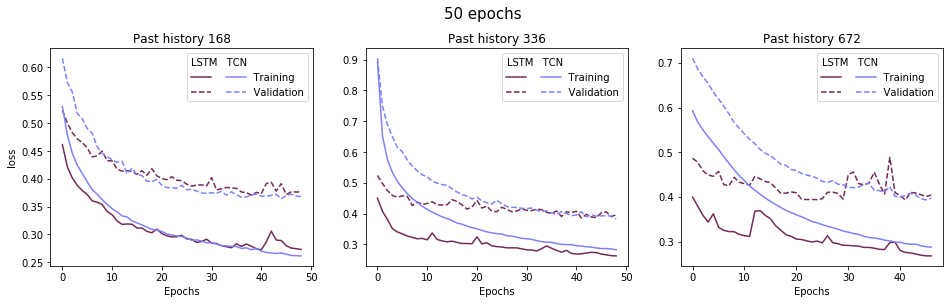

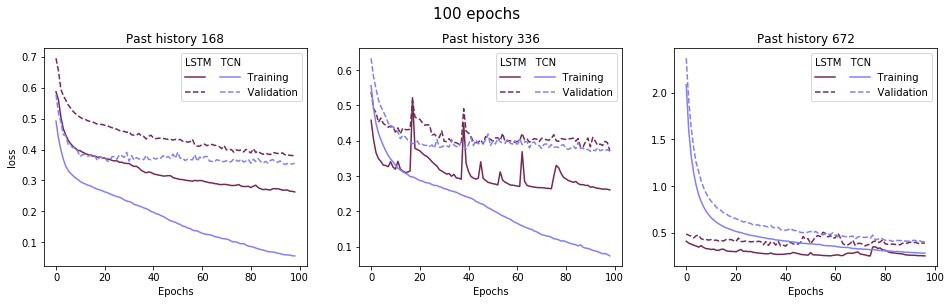

In [8]:
# 25 Epochs
fig,ax = plt.subplots(1,3, figsize=(16,4))

for i, (ph, _results) in enumerate(results[results['EPOCHS']==25].groupby('PAST_HISTORY')):
    
    line_columns = []
    for arch, __results in _results.groupby('ARCHITECTURE'):
        loss = np.fromstring(__results.sort_values(METRIC).head(1)['loss'].iloc[0].replace('[','').replace(']',''), dtype='float32', sep=',')
        val_loss = np.fromstring(__results.sort_values(METRIC).head(1)['val_loss'].iloc[0].replace('[','').replace(']',''), dtype='float32', sep=',')
          
        loss, val_loss = (loss[1:], val_loss[1:]) if i < 2 else (loss[3:], val_loss[3:])
        
        loss_line = ax[i].plot(loss, label=('loss',arch), c=cmap[arch])
        valloss_line = ax[i].plot(val_loss, label=('val',arch), c=cmap[arch], linestyle='--')
        
        line_columns.append(loss_line[0])
        line_columns.append(valloss_line[0])
        
        ax[i].set_xlabel('Epochs')
        if i==0:
            ax[i].set_ylabel('loss')
        ax[i].set_title('Past history '+str(ph))
    
    # Create legend
    leg = ax[i].legend(line_columns, ['', '', '    Training', '    Validation'], 
             title='LSTM   TCN                  ', handletextpad=-0.5,  
             ncol=2, numpoints=1)

fig.suptitle('25 epochs', y=1.025, fontsize=15)
fig.show()

# 50 Epochs
fig,ax = plt.subplots(1,3, figsize=(16,4))

for i, (ph, _results) in enumerate(results[results['EPOCHS']==50].groupby('PAST_HISTORY')):
    
    line_columns = []
    for arch, __results in _results.groupby('ARCHITECTURE'):
        loss = np.fromstring(__results.sort_values(METRIC).head(1)['loss'].iloc[0].replace('[','').replace(']',''), dtype='float32', sep=',')
        val_loss = np.fromstring(__results.sort_values(METRIC).head(1)['val_loss'].iloc[0].replace('[','').replace(']',''), dtype='float32', sep=',')
          
        loss, val_loss = (loss[1:], val_loss[1:]) if i < 2 else (loss[3:], val_loss[3:])
        
        loss_line = ax[i].plot(loss, label=('loss',arch), c=cmap[arch])
        valloss_line = ax[i].plot(val_loss, label=('val',arch), c=cmap[arch], linestyle='--')
        
        line_columns.append(loss_line[0])
        line_columns.append(valloss_line[0])
        
        ax[i].set_xlabel('Epochs')
        if i==0:
            ax[i].set_ylabel('loss')
        ax[i].set_title('Past history '+str(ph))
    
    # Create legend
    leg = ax[i].legend(line_columns, ['', '', '    Training', '    Validation'], 
             title='LSTM   TCN                  ', handletextpad=-0.5,  
             ncol=2, numpoints=1)
fig.suptitle('50 epochs', y=1.025, fontsize=15)
fig.show()

# 100 Epochs
fig,ax = plt.subplots(1,3, figsize=(16,4))

for i, (ph, _results) in enumerate(results[results['EPOCHS']==100].groupby('PAST_HISTORY')):
    
    line_columns = []
    for arch, __results in _results.groupby('ARCHITECTURE'):
        loss = np.fromstring(__results.sort_values(METRIC).head(1)['loss'].iloc[0].replace('[','').replace(']',''), dtype='float32', sep=',')
        val_loss = np.fromstring(__results.sort_values(METRIC).head(1)['val_loss'].iloc[0].replace('[','').replace(']',''), dtype='float32', sep=',')
          
        loss, val_loss = (loss[1:], val_loss[1:]) if i < 2 else (loss[3:], val_loss[3:])
        
        loss_line = ax[i].plot(loss, label=('loss',arch), c=cmap[arch])
        valloss_line = ax[i].plot(val_loss, label=('val',arch), c=cmap[arch], linestyle='--')
        
        line_columns.append(loss_line[0])
        line_columns.append(valloss_line[0])
        
        ax[i].set_xlabel('Epochs')
        if i==0:
            ax[i].set_ylabel('loss')
        ax[i].set_title('Past history '+str(ph))
    
    # Create legend
    leg = ax[i].legend(line_columns, ['', '', '    Training', '    Validation'], 
             title='LSTM   TCN                  ', handletextpad=-0.5,  
             ncol=2, numpoints=1)

fig.suptitle('100 epochs', y=1.025, fontsize=15)
fig.show()


/home/plara/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


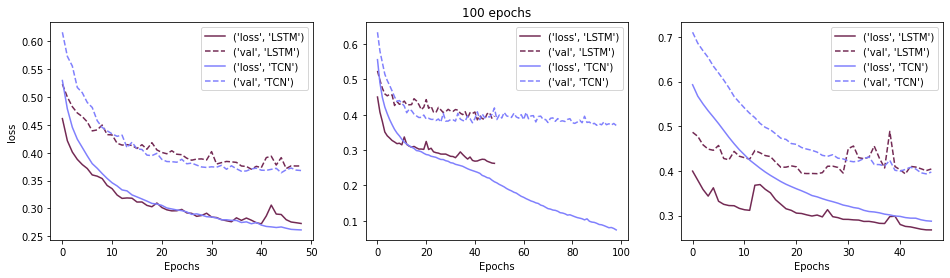

In [9]:
fig,ax = plt.subplots(1,3, figsize=(16,4))

for i, (ph, _results) in enumerate(results.groupby('PAST_HISTORY')):
    for arch, __results in _results.groupby('ARCHITECTURE'):
        loss = np.fromstring(__results.sort_values(METRIC).head(1)['loss'].iloc[0].replace('[','').replace(']',''), dtype='float32', sep=',')
        val_loss = np.fromstring(__results.sort_values(METRIC).head(1)['val_loss'].iloc[0].replace('[','').replace(']',''), dtype='float32', sep=',')
        
        
        loss, val_loss = (loss[1:], val_loss[1:]) if i < 2 else (loss[3:], val_loss[3:])
        
        ax[i].plot(loss, label=('loss',arch), c=cmap[arch])
        ax[i].plot(val_loss, label=('val',arch), c=cmap[arch], linestyle='--')
        ax[i].set_xlabel('Epochs')
        if i==0:
            ax[i].set_ylabel('loss')
    ax[i].legend()
ax[1].set_title('100 epochs')

fig.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

0 168 LSTM
	MODEL: LSTM_5
	MODEL_DESCRIPTION: {'num_stack_layers': 2, 'units': 128, 'dropout': 0}
	FORECAST_HORIZON: 48
	PAST_HISTORY: 168
	BATCH_SIZE: 128
	EPHOCS: 50
0 168 TCN
	MODEL: TCN_951
	MODEL_DESCRIPTION: {'nb_filters': 128, 'kernel_size': 3, 'nb_stacks': 1, 'dilations': [1, 5, 7, 14, 28, 56], 'dropout_rate': 0}
	FORECAST_HORIZON: 48
	PAST_HISTORY: 168
	BATCH_SIZE: 128
	EPHOCS: 50
1 336 LSTM
	MODEL: LSTM_7
	MODEL_DESCRIPTION: {'num_stack_layers': 3, 'units': 64, 'dropout': 0}
	FORECAST_HORIZON: 48
	PAST_HISTORY: 336
	BATCH_SIZE: 64
	EPHOCS: 50
1 336 TCN
	MODEL: TCN_968
	MODEL_DESCRIPTION: {'nb_filters': 128, 'kernel_size': 3, 'nb_stacks': 2, 'dilations': [1, 5, 7, 14, 28, 56], 'dropout_rate': 0}
	FORECAST_HORIZON: 48
	PAST_HISTORY: 336
	BATCH_SIZE: 64
	EPHOCS: 50
2 672 LSTM
	MODEL: LSTM_4
	MODEL_DESCRIPTION: {'num_stack_layers': 2, 'units': 64, 'dropout': 0}
	FORECAST_HORIZON: 48
	PAST_HISTORY: 672
	BATCH_SIZE: 64
	EPHOCS: 50
2 672 TCN
	MODEL: TCN_798
	MODEL_DESCRIPTION: {'nb_

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


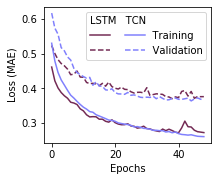

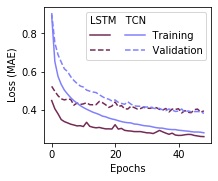

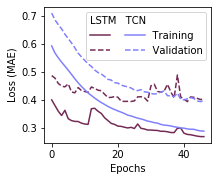

In [10]:
for i, (ph, _results) in enumerate(results[results['EPOCHS']==50].groupby('PAST_HISTORY')):
    fig,ax = plt.subplots(1,1, figsize=(3,2.5))
    line_columns = []
    for arch, __results in _results.groupby('ARCHITECTURE'):
        print(str(i), str(ph),arch) 
        top_tcn = __results.sort_values(METRIC).head(1)
        print('\t'+'\n\t'.join(['{}: {}'.format(k,v) for k,v in zip(top_tcn.index.names,top_tcn.index[0])]))
        print('\tEPHOCS: '+str(top_tcn[['EPOCHS']].values[0][0]))
        loss = np.fromstring(__results.sort_values(METRIC).head(1)['loss'].iloc[0].replace('[','').replace(']',''), dtype='float32', sep=',')
        val_loss = np.fromstring(__results.sort_values(METRIC).head(1)['val_loss'].iloc[0].replace('[','').replace(']',''), dtype='float32', sep=',')
          
        loss, val_loss = (loss[1:], val_loss[1:]) if i < 2 else (loss[3:], val_loss[3:])
        
        loss_line = ax.plot(loss, label=('loss',arch), c=cmap[arch])
        valloss_line = ax.plot(val_loss, label=('val',arch), c=cmap[arch], linestyle='--')
        
        line_columns.append(loss_line[0])
        line_columns.append(valloss_line[0])
        
        ax.set_xlabel('Epochs')
        ax.set_ylabel('Loss (MAE)')
    
    # Create legend
    leg = ax.legend(line_columns, ['', '', '    Training', '    Validation'], 
             title='LSTM   TCN                  ', handletextpad=-0.5,  
             ncol=2, numpoints=1)
    fig.savefig('../files/images/EV-loss_50epochs_{}PastHistory.eps'.format(ph), format='eps', bbox_inches='tight')
